>>## Task 3
- For each of the four primary categories considered (2018-2022) , draw a pie chart with slices (%age) for
  - single author papers 
  - two authors papers
  - 3-4 authors papers
  - More than four authors

<b>Imoprting required libraries</b>

In [1]:
#importing required libraries and functions
import pandas as pd
import matplotlib.pyplot as plt

<b> Loading the data from CSV file and defining author range count to distinguish single single, two, 3-4, more than four authors </b>

In [2]:
#loading the metadata from the CSV file
metadata_df = pd.read_csv('arxiv_metadata.csv')

#defining the primary categories
categories = ["cs.DB", "cs.GR", "cs.RO", "cs.ET"]

#defining the author count ranges so that we can different between single, two, 3-4, more than four authors
author_ranges = {
    'Single Author': 1,
    'Two Authors': 2,
    '3-4 Authors': range(3, 5),
    'More than Four Authors': range(5, (metadata_df['authors'].str.count(',')).max())
}

<b> Code to collect the data to draw the pie charts for each category<b>

In [3]:
#creating a dictionary to store the pie chart data for each category
pie_chart_data = {}

#looping through the categories
for category in categories:
    category_df = metadata_df[(metadata_df['primary_category'] == category)]
    category_pie_data = []

    #calculating the percentage of papers for each author count range
    for range_label, range_value in author_ranges.items():
        #checking if the range value is an integer
        if isinstance(range_value, int):
            #calculating the count of papers with the specific author count value
            count = len(category_df[category_df['authors'].str.count(',') + 1 == range_value])
            #print("Count", count)
        #for any range_values which are not integers and it is cretain range of values
        else:
            #calculating the count of papers within the author count range
            count = len(category_df[category_df['authors'].str.count(',').between(range_value.start, range_value.stop - 1)])
        
        #appending the count to the category_pie_data list
        category_pie_data.append(count)

    #storing the pie chart data for the category
    pie_chart_data[category] = category_pie_data

<b> Ploting the Pies charts from the above collected data for each category</b>

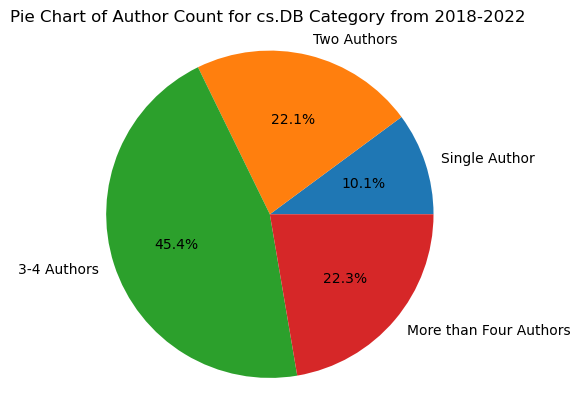

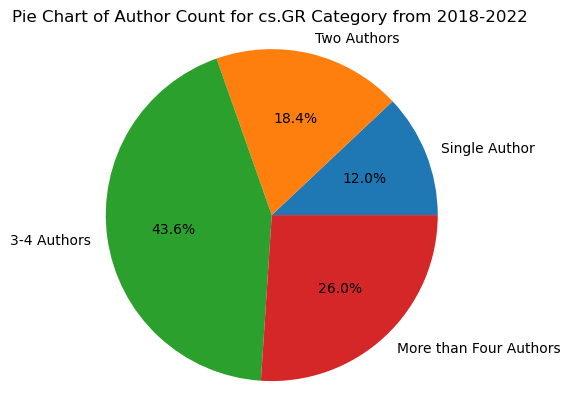

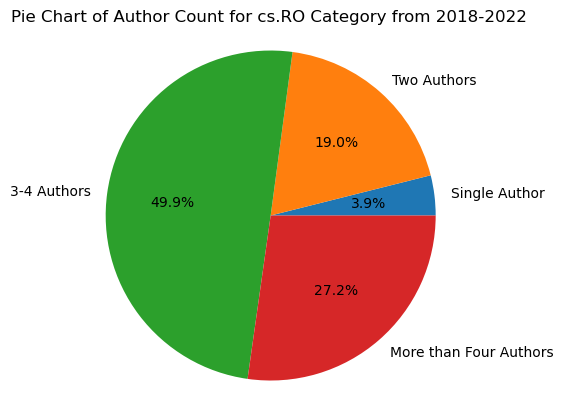

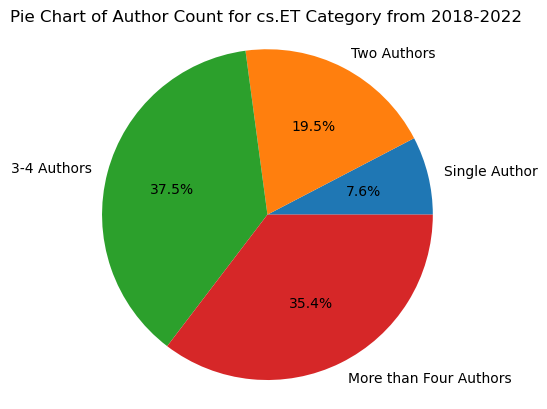

In [4]:
#ploting the pie charts for each category
for category in categories:
    plt.title(f"Pie Chart of Author Count for {category} Category from 2018-2022")
    plt.pie(pie_chart_data[category], labels=author_ranges.keys(), autopct='%1.1f%%')
    plt.axis('equal')
    plt.show()